<a href="https://colab.research.google.com/github/myllanes/ECGR4105M.Y/blob/main/Project_bankrupt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


data = pd.read_csv('https://raw.githubusercontent.com/myllanes/ECGR4105M.Y./main/american_bankruptcyCOPY.csv', na_values='*')

display(data)

,status_label,year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,1,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,372.7519,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,1,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,377.1180,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,1,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,364.5928,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,1,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,143.3295,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,1,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,308.9071,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,1,2014,233.211,43.338,14.094,45.615,3.376,25.261,22.846,756.4827,104.223,1099.101,184.666,31.521,60.885,28.197,28.095,104.223,225.887,58.608
78678,1,2015,105.559,59.184,42.592,202.133,2.288,129.688,54.611,527.5750,291.153,1865.926,770.103,159.541,231.969,88.128,157.783,291.153,880.327,89.020
78679,1,2016,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,578.8868,169.858,1746.235,683.985,13.994,100.784,85.765,156.341,169.858,770.233,90.807
78680,1,2017,135.207,66.527,65.330,69.171,2.013,-20.401,27.217,412.6241,161.884,1736.110,694.035,3.841,95.357,82.010,135.941,161.884,776.697,92.713


In [ ]:
test123 = data.loc[data.year==2003,:]
test123 = test123.loc[test123.status_label==0,:]

display(test123)


,status_label,year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
54,0,2003,4682.000,14430.000,1377.000,582.000,516.000,-1228.000,796.000,2066.5869,17440.000,29330.000,13126.000,-795.000,3010.000,6559.000,-1336.000,17440.000,29284.000,16858.000
177,0,2003,110.578,224.944,1.036,13.973,41.696,7.595,46.100,190.5996,271.276,123.519,0.000,12.937,46.332,38.950,47.182,271.276,38.950,257.303
243,0,2003,185.651,1700.737,5.665,14.893,6.874,3.102,140.425,57.1539,1721.929,210.261,11.475,9.228,21.192,152.665,30.117,1721.929,168.029,1707.036
463,0,2003,0.706,1.530,0.615,0.746,0.000,-1.948,0.453,11.3732,3.148,16.470,3.023,0.131,1.618,2.371,1.477,3.148,12.595,2.402
595,0,2003,70.018,349.167,24.162,37.433,19.004,-109.681,39.979,13.3995,423.920,230.324,175.184,13.271,74.753,54.886,-119.894,423.920,272.259,386.487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68289,0,2003,38.081,37.071,2.523,-2.326,9.609,-5.128,1.055,75.7853,79.308,45.176,0.816,-4.849,42.237,10.443,-78.656,79.308,11.259,81.634
68332,0,2003,80.271,55.386,39.774,95.674,0.000,18.285,24.020,345.0000,167.051,536.285,188.017,55.900,111.665,29.011,89.192,167.051,276.707,71.377
68366,0,2003,69.215,22.286,0.736,-18.661,0.000,-20.975,3.000,169.7925,3.625,84.175,1.487,-19.397,-18.661,8.646,-44.092,3.625,14.025,22.286
68424,0,2003,661.152,1834.005,48.058,174.209,157.695,18.950,376.218,1376.2999,2349.859,1549.357,445.535,126.151,515.854,609.256,-38.557,2349.859,1154.009,2175.650


In [ ]:
test = data.loc[data.year==2003,:]
test1 = test.loc[test.status_label==0,:]

test2 = test.loc[test.status_label==1,:]
test2 = test2.head(400)

data = pd.concat([test1, test2], axis=0)

display(data)


,status_label,year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
54,0,2003,4682.000,14430.000,1377.000,582.000,516.000,-1228.000,796.000,2066.5869,17440.000,29330.000,13126.000,-795.000,3010.000,6559.000,-1336.000,17440.000,29284.000,16858.000
177,0,2003,110.578,224.944,1.036,13.973,41.696,7.595,46.100,190.5996,271.276,123.519,0.000,12.937,46.332,38.950,47.182,271.276,38.950,257.303
243,0,2003,185.651,1700.737,5.665,14.893,6.874,3.102,140.425,57.1539,1721.929,210.261,11.475,9.228,21.192,152.665,30.117,1721.929,168.029,1707.036
463,0,2003,0.706,1.530,0.615,0.746,0.000,-1.948,0.453,11.3732,3.148,16.470,3.023,0.131,1.618,2.371,1.477,3.148,12.595,2.402
595,0,2003,70.018,349.167,24.162,37.433,19.004,-109.681,39.979,13.3995,423.920,230.324,175.184,13.271,74.753,54.886,-119.894,423.920,272.259,386.487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6865,1,2003,22.353,6.812,0.283,1.874,0.000,1.290,20.881,11.7354,8.686,24.620,4.646,1.591,1.874,17.185,-6.876,8.686,21.875,6.812
6880,1,2003,762.179,2318.582,25.816,212.578,0.000,121.952,448.324,3956.4090,2624.941,1040.847,0.000,186.762,306.359,392.122,618.959,2624.941,392.122,2412.363
6910,1,2003,16.639,29.907,1.500,3.673,7.441,-0.709,7.080,15.2161,40.278,32.381,6.022,2.173,10.371,10.113,2.902,40.278,16.797,36.605
6930,1,2003,69.787,183.782,7.056,17.009,30.259,6.722,30.909,5.9220,212.125,132.930,67.630,9.953,28.343,28.433,-23.975,212.125,101.658,195.116


In [ ]:
# In our dataset, Independent variables or features.
X = data.loc[:,['X3','X18']]
Y = data.loc[:,'status_label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [ ]:
# Now predict the target for the test data
Y_pred = classifier.predict(X_test)

In [ ]:
# Performance evaluation: we can use confusion matrix to see the performance of the model
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[85, 16],
       [70, 33]])

Text(0.5, 427.9555555555555, 'Predicted Label')

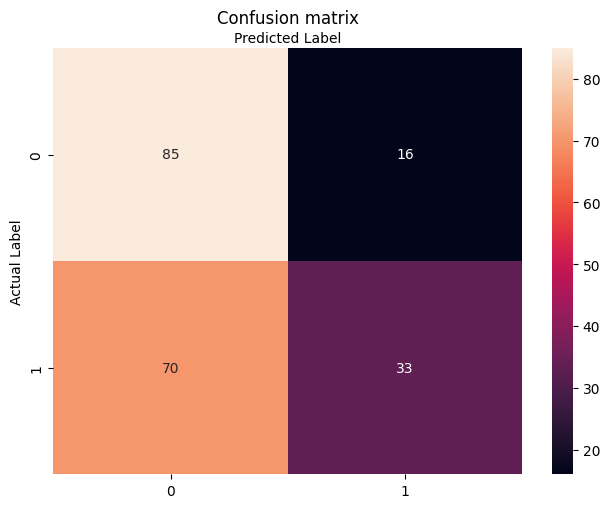

In [ ]:
# Let's visualize the confusion matrix using a heatmap
import seaborn as sns
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [ ]:
# Evaluate the classifier performance in terms of accuracy, precision and recall
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(Y_test,Y_pred))
print("Precision:", metrics.precision_score(Y_test,Y_pred))
print("Recall:", metrics.recall_score(Y_test,Y_pred))

Accuracy: 0.5784313725490197
Precision: 0.673469387755102
Recall: 0.32038834951456313


<ipython-input-32-d798b222da98>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


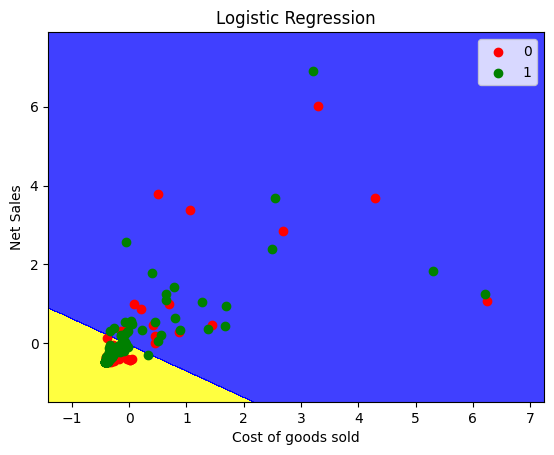

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('yellow', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression')
plt.xlabel('Cost of goods sold')
plt.ylabel('Net Sales')
plt.legend()
plt.show()

In [ ]:
def get_modified_inputs(X):
  x_0 = np.ones([X.shape[0], 1])
  inputs= np.concatenate((x_0, X), axis = -1)
  return inputs


In [ ]:
def compute_cost(X,y,theta):
  M = X.shape[0]
  predictions = X.dot(theta)
  errors = np.subtract(predictions, y)
  sqrErrors = np.square(errors)
  J = 1 / (2 * M) * np.sum(sqrErrors)
  return J

In [ ]:
def compute_cost_regularized(X, y, theta, lamda):
  M = X.shape[0]
  predictions = X.dot(theta)
  errors = np.subtract(predictions, y)
  sqrErrors = np.square(errors)
  reg_term = lamda * np.sum(np.square(theta[1:]))
  J =  1 / (2 * M)* (np.sum(sqrErrors) + reg_term)
  return J

In [ ]:
def gradient_descent(X_train, y_train, X_test, y_test, lr, n_epochs, lamda = None):
  thetas = np.zeros([X_train.shape[1], 1])
  train_losses = []
  test_losses = []
  train_cost_history = np.zeros(n_epochs)
  test_cost_history = np.zeros(n_epochs)
  M=X_train.shape[0]
  for i in range(n_epochs):
    predictions = X_train.dot(thetas)
    errors = np.subtract(predictions, y_train)
    sum_delta = (lr / M) * X_train.transpose().dot(errors)
    if lamda!=None:
      sum_delta[1:] +=  lr * lamda /M * thetas[1:]
    thetas = thetas - sum_delta;
    if lamda==None:
      train_loss = compute_cost(X_train, y_train, thetas)
      train_cost_history[i] = train_loss
      test_loss = compute_cost(X_test, y_test, thetas)
      test_cost_history[i] = test_loss
    if lamda!=None:
      train_loss = compute_cost_regularized(X_train, y_train, thetas, lamda)
      train_cost_history[i] = train_loss
      test_loss = compute_cost(X_test, y_test, thetas)
      test_cost_history[i] = test_loss
    if i % 10 == 0:
      print('Epoch %d, Train Loss %f' % (i, float(train_loss)))
      print('Epoch %d, Test Loss %f' % (i, float(test_loss)))
  return thetas, train_cost_history, test_cost_history
